In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp
import scipy as sy
from scipy.integrate import odeint

In [33]:
phi,V0,lam_sym = sp.symbols('phi V0 lam',real =True)


V=V0*(1-sp.exp(-sp.sqrt(2/3)*phi))**2
dVdphi = sp.diff(V,phi)
d2Vdphi2 = sp.diff(V,phi,2)
lam = -1/V *dVdphi
gam = (d2Vdphi2*V)/(dVdphi**2)

lam_simplified = sp.simplify(lam)
print("lam(phi) =", lam_simplified)

# Substitute phi(lambda)
phi_of_lam = sp.sqrt(3/2) * sp.log(1 + 2*sp.sqrt(2/3)/lam_sym)
gam_of_lam = gam.subs(phi, phi_of_lam)
gam_of_lam_simplified = sp.simplify(gam_of_lam)
print(rf"gamma(lam) =", gam_of_lam_simplified)

#test = gam_of_lam_simplified.subs(lam_sym,5)
#print(test)

lam(phi) = 1.63299316185545/(1 - exp(0.816496580927726*phi))
gamma(lam) = 1.0 - 0.5*((lam + 1.63299316185545)/lam)**1.0


<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_19709/1652279173.py:6: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Starobinsky potential $V(\phi)$ vs scalar field $\phi$')


Text(0.5, 1.0, 'Starobinsky potential $V(\\phi)$ vs scalar field $\\phi$')

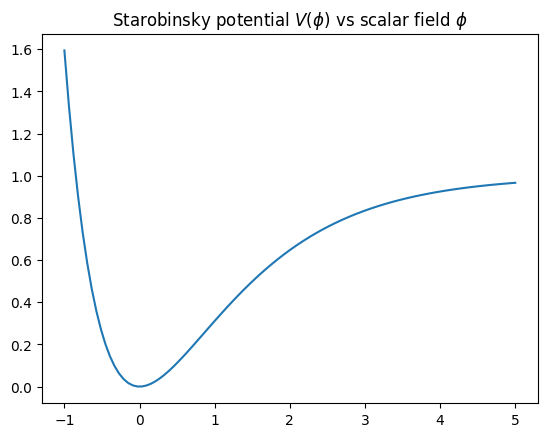

In [34]:
#Starobinsky potential model
phi = np.linspace(-1,5,100)
V_0= 1
V=V_0*(1-np.exp(-((2/3)**0.5)*phi))**2
plt.plot(phi,V)
plt.title('Starobinsky potential $V(\phi)$ vs scalar field $\phi$')

<>:38: SyntaxWarning: invalid escape sequence '\o'
<>:38: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_19709/2503640462.py:38: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(N_span, w, label='$\omega_\phi$')
/tmp/ipykernel_19709/2503640462.py:30: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(system, X0, N_span)
/tmp/ipykernel_19709/2503640462.py:34: RuntimeWarning: invalid value encountered in divide
  w = (x**2 - y**2) / (x**2 + y**2)


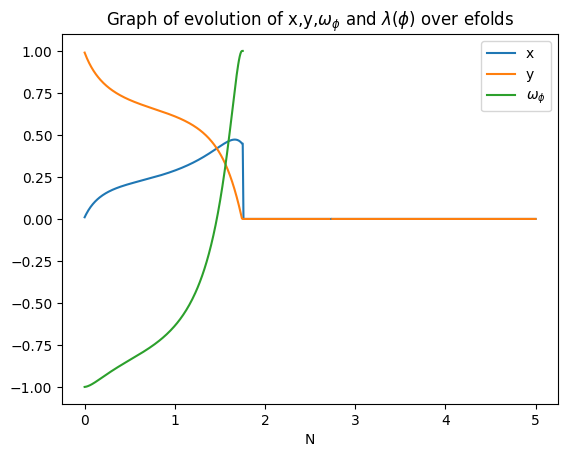

In [74]:
wb = 0  # dust

def Gamma(lam):
    return 1-0.5*((lam+2*np.sqrt(2/3))/lam)  #1.0 - 0.5*((lam + 1.63299316185545)/lam)
                                             #1-0.5*((lam+2*np.sqrt(2/3))/lam)
def system(X,N):
    x, y, lam = X

    dx = (-3*x
          + np.sqrt(3/2)*lam*y**2
          + 1.5*x*((1-wb)*(x**2-y**2)
          + (1+wb)*(1-x**2-y**2)))  #shows how the kinetic energy density fraction grows over e folds

    dy = (-np.sqrt(3/2)*x*y*lam
          + 1.5*y*((1-wb)*(x**2-y**2)
          + (1+wb)*(1-x**2-y**2)))  #shows how the potential energy density fraction grows over e folds

    dlam = -np.sqrt(6)*x*lam**2*(Gamma(lam)-1)  #shows the potnetial gradient change over e folds

    return [dx, dy, dlam]

# Initial conditions
X0 = [0.01, 0.99, 1]  #initial conditions for inflation, at inflation x<<y and y approaches 1, potential dominated.
N_span = np.linspace(0, 5, 600)# inflation started approx 60 efolds ago
#   early time inflation slow roll [0.01, 0.99, 0.01-1], wb=0, N=0-5
#   early time post inflation radiation dom time [0.05, 0.95, 1-3], wb=1/3, N=0-5
#   late time tracking [0.1, 0.1, 1-5], wb=0, N=0-60 or 100
#   late time tracking and scaling and DE [0.01, 0.01, 0.5] lambda dominated universe, wb = -1, N=0-60 or 100

sol = odeint(system, X0, N_span)
x = sol[:,0]
y = sol[:,1]
lam = sol[:,2]
w = (x**2 - y**2) / (x**2 + y**2)
plt.plot(N_span,x, label='x')
plt.plot(N_span, y, label='y')
#plt.plot(N_span, lam, label='$\lambda$')
plt.plot(N_span, w, label='$\omega_\phi$')
plt.title(rf"Graph of evolution of x,y,$\omega_\phi$ and $\lambda(\phi)$ over efolds")
plt.legend()
plt.xlabel("N")
plt.show()


In [ ]:
#  generating dynamical system phase portraits


#dx = (-3*x + np.sqrt(3/2)*lam*y**2 + 1.5*x*((1-wb)*(x**2-y**2) + (1+wb)*(1-x**2-y**2)))
#dy = (-np.sqrt(3/2)*x*y*lam + 1.5*y*((1-wb)*(x**2-y**2) + (1+wb)*(1-x**2-y**2)))
#dlam = -np.sqrt(6)*x*lam**2*(Gamma(lam)-1)

# define constants
wb = 0 #dust
lam_fixed = 5 #arbitrary gradient of potential CHANGING THIS YIELDS A DIFFERENT VECTOR FIELD


def Gamma(lam):
    return 1 + 0.5*(1 - 2/lam**2)

def dynamicsStateSpace(x,y,lam):
  dXdt = [(-3*x + np.sqrt(3/2)*lam*y**2 + 1.5*x*((1-wb)*(x**2-y**2) + (1+wb)*(1-x**2-y**2))),
   (-np.sqrt(3/2)*x*y*lam + 1.5*y*((1-wb)*(x**2-y**2) + (1+wb)*(1-x**2-y**2))),
    -np.sqrt(6)*x*lam**2*(Gamma(lam) - 1)]

  return [dXdt[0],dXdt[1],dXdt[2]]

# defining a grid of points at which we create/compute tangent arrows
x0 = np.linspace(-1.5,1.5,30)
x1 = np.linspace(-0.1,1.5,20)
X0,X1 = np.meshgrid(x0,x1)
dX0 = np.zeros(X0.shape)
dX1 = np.zeros(X1.shape)
#shape1,shape2 = X1.shape

for i in range(X0.shape[0]):
    for j in range(X0.shape[1]):
        if X0[i,j]**2 + X1[i,j]**2 <= 1.0:
            dXdtAtX = dynamicsStateSpace(X0[i,j], X1[i,j], lam_fixed)
            dX0[i,j] = dXdtAtX[0]
            dX1[i,j] = dXdtAtX[1]
        else:
            dX0[i,j] = np.nan
            dX1[i,j] = np.nan

x_FP, y_FP = sp.symbols('x y', real=True)

f = (-3*x_FP+ sp.sqrt(3/2)*lam_fixed*y_FP**2+ 1.5*x_FP*((1-wb)*(x_FP**2-y_FP**2) + (1+wb)*(1-x_FP**2-y_FP**2)))

g = (-sp.sqrt(3/2)*lam_fixed*x_FP*y_FP + 1.5*y_FP*((1-wb)*(x_FP**2-y_FP**2)+ (1+wb)*(1-x_FP**2-y_FP**2)))

solutions = sp.solve([f, g], [x_FP, y_FP], dict=True)
FP=[]
for sol in solutions:
  x_val = sol[x_FP]
  y_val = sol[y_FP]
  if x_val.is_real and y_val.is_real and y_val>=0:
      FP.append([float(x_val.evalf()),float(y_val.evalf())])
FP=np.array(FP)
print("Physical fixed points:", FP)



def dynamics_odeint(X,N):
  x,y,lam = X
  lam=lam_fixed
  dx,dy,dlam = dynamicsStateSpace(x,y,lam)
  return [dx,dy,dlam]


plt.figure(figsize=(8,8))
plt.quiver(X0, X1, dX0, dX1, color='b')
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title(rf"Phase Portrait in $(x,y)$ at fixed $\lambda = {lam_fixed}$")
plt.xlim(-1.5,1.5)
plt.ylim(-0.1,1.5)
plt.tick_params(axis='both', which='major', labelsize=12)



# plot the dynamics on the same graph
initialState=np.array([-0.5,0.8,lam_fixed])# CHANGING THESE YIELDS A DIFFERENT TRAJECTORY. choose suitable starting position
simulationTime=np.linspace(0,5,200)
# generate the state-space trajectory
solutionState=odeint(dynamics_odeint,initialState,simulationTime)

plt.plot(solutionState[:,0],solutionState[:,1],'r-',linewidth=2,label='Trajectory')
plt.plot(solutionState[0,0], solutionState[0,1], 'ro', label="Initial condition")

for fp in fixed_points:
    plt.plot(fp[0], fp[1], 'k*', markersize=12, label='Fixed point')




plt.legend()
plt.show()
